In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle
import joblib
from sklearn.model_selection import train_test_split

In [266]:
df=pd.read_csv(r'D:\Projects\chennai-house-price-prediction\train.csv')

In [267]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [268]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [269]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

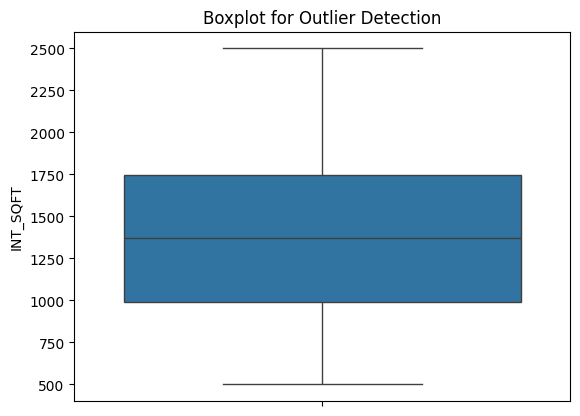

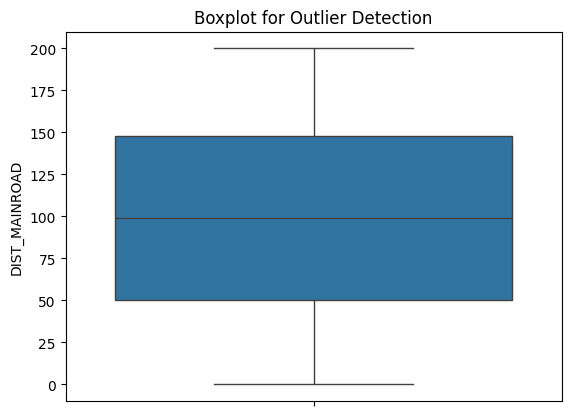

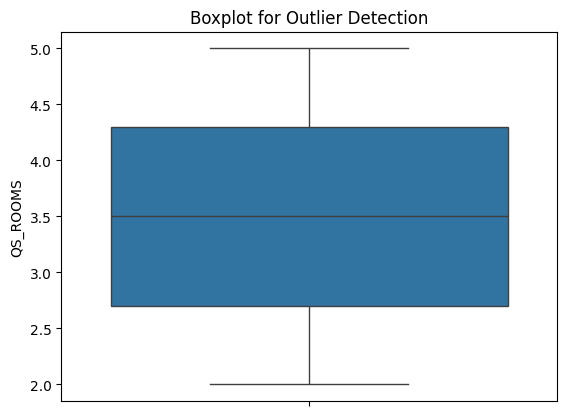

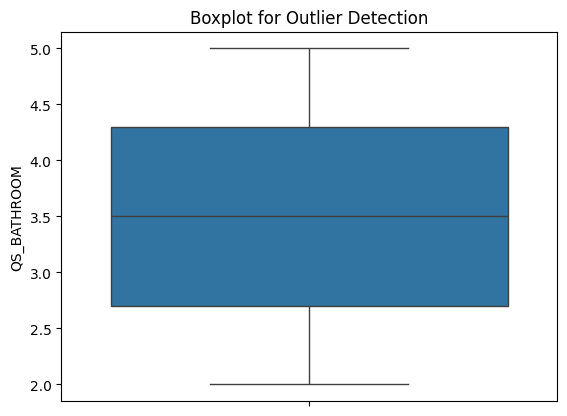

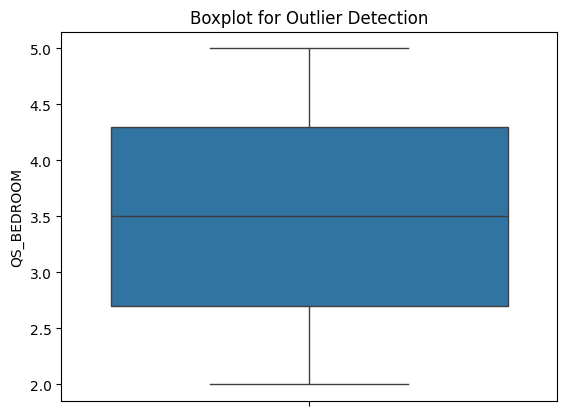

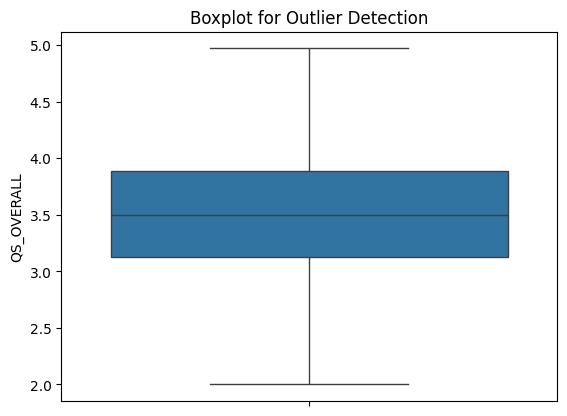

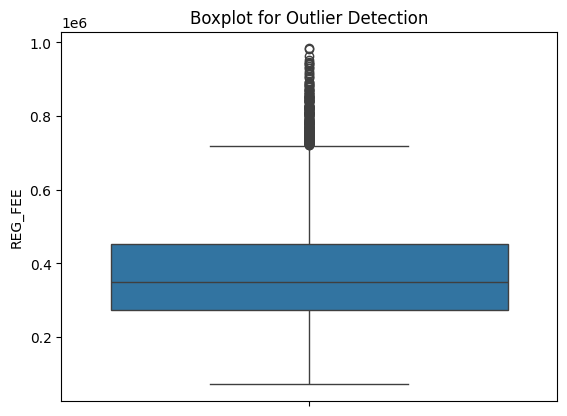

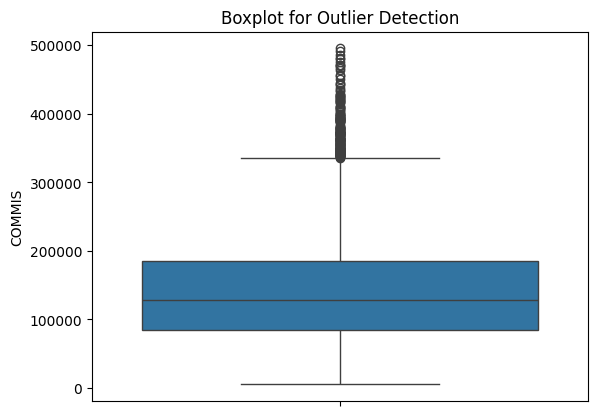

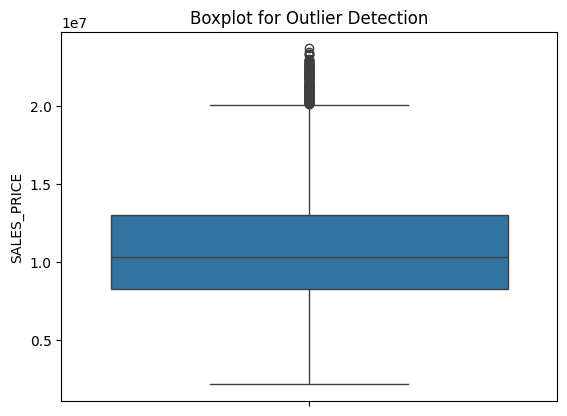

In [270]:
cont_cols = list(df.select_dtypes(include=['int64', 'float64']))
cont_cols.remove('N_BATHROOM')
cont_cols.remove('N_ROOM')
cont_cols.remove('N_BEDROOM')
for i in cont_cols:
    sns.boxplot(df[i])
    plt.title("Boxplot for Outlier Detection")
    plt.ylabel(i)
    plt.show()    

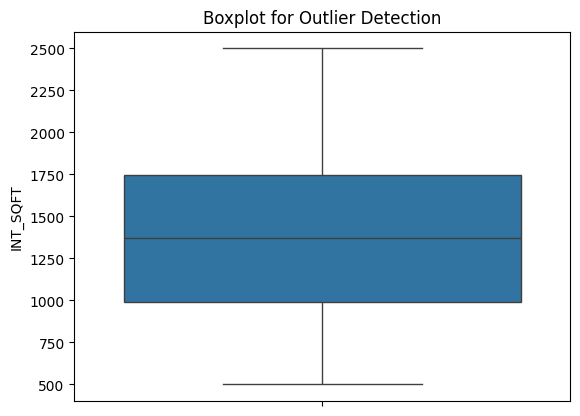

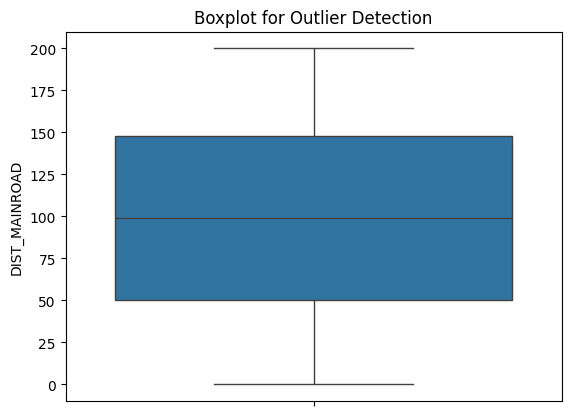

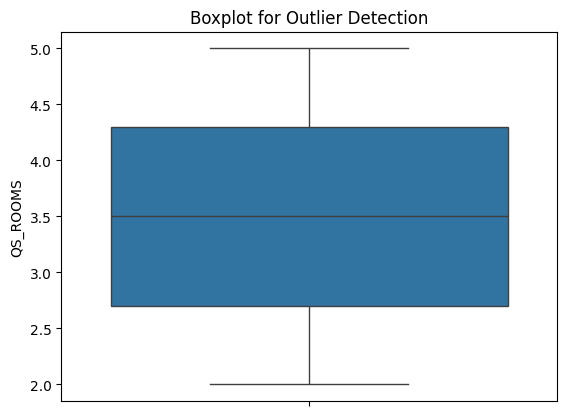

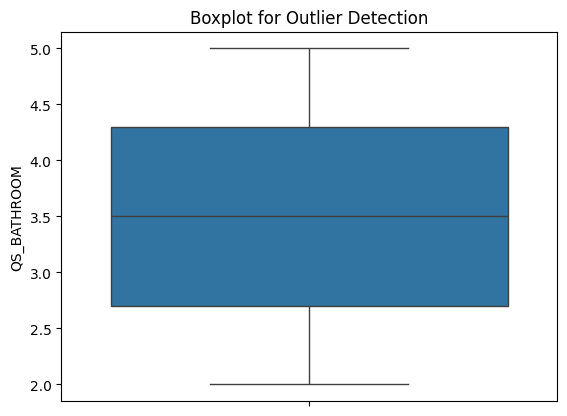

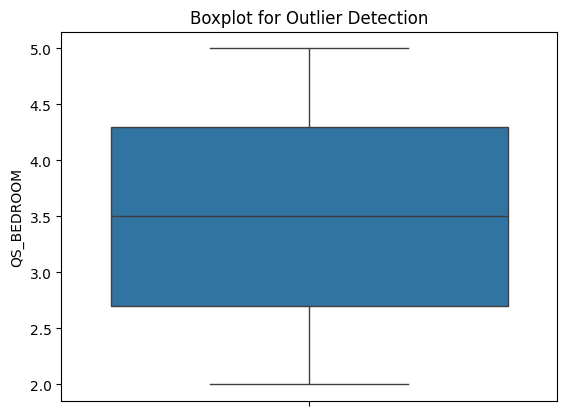

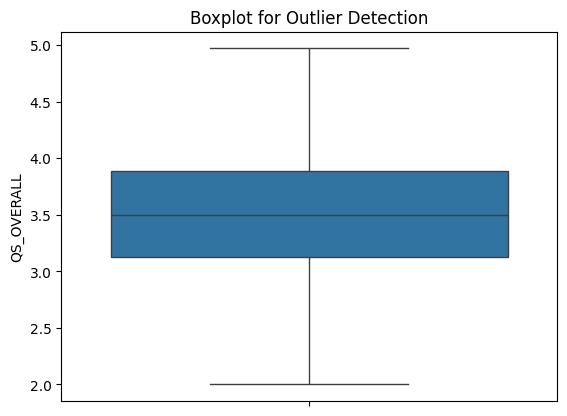

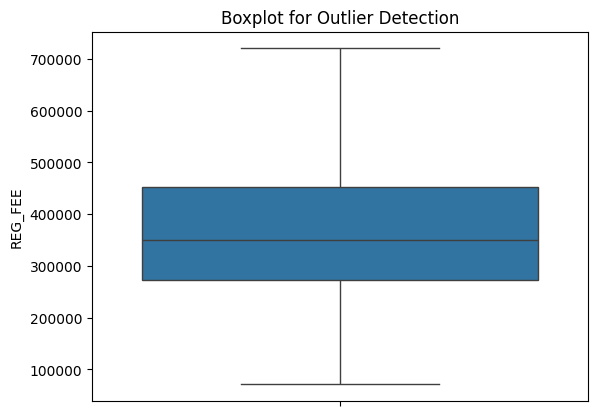

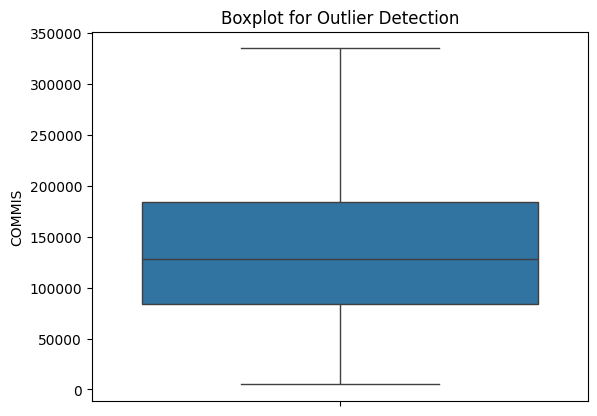

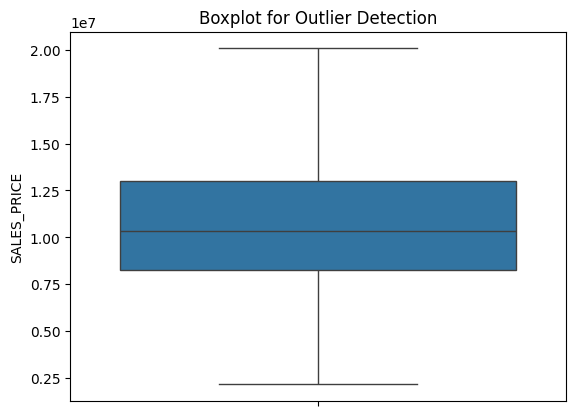

In [271]:
for i in cont_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[i] = df[i].clip(lower_bound, upper_bound)
    sns.boxplot(df[i])
    plt.title("Boxplot for Outlier Detection")
    plt.ylabel(i)
    plt.show()

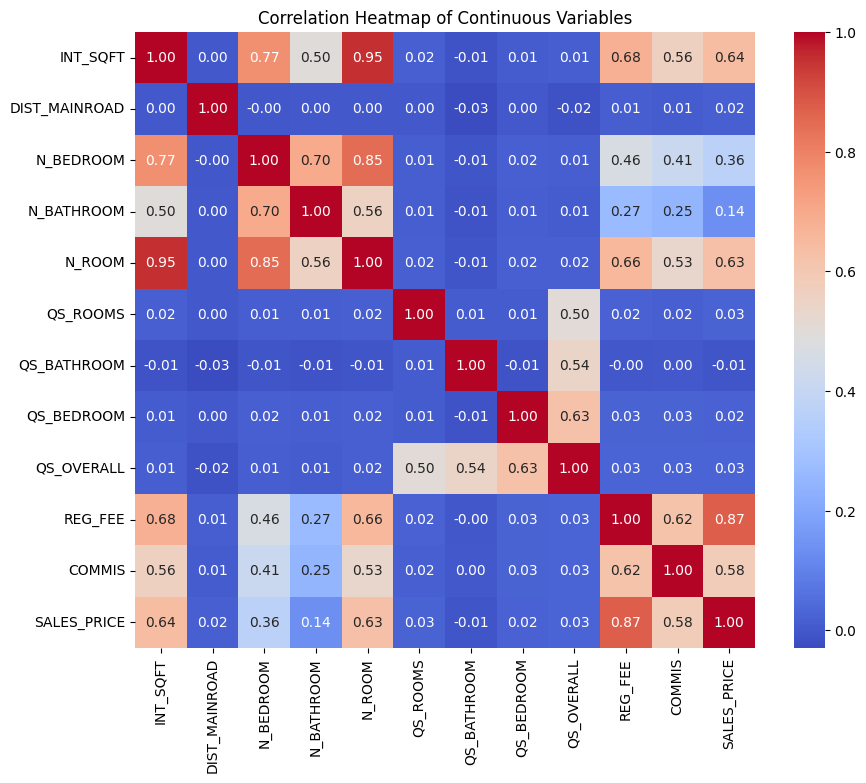

In [272]:
# Select only numeric/continuous columns
cont_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = cont_cols.corr(method = "spearman")

# Heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

In [273]:
cont_cols = df.select_dtypes(include=['int64', 'float64'])
correlation = cont_cols.corr(method="spearman")["SALES_PRICE"]

# Select columns with strong correlation
strong_corr_cols = correlation[(correlation <= -0.5) | (correlation >= 0.5)].index

# Filter dataframe to keep only these columns
df_filtered = df[strong_corr_cols]
df.drop(columns = list(cont_cols),axis=1,inplace=True)
print("Columns kept:", list(df_filtered.columns))

Columns kept: ['INT_SQFT', 'N_ROOM', 'REG_FEE', 'COMMIS', 'SALES_PRICE']


In [274]:
df.shape

(7109, 10)

In [275]:
df.columns

Index(['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PRT_ID         7109 non-null   object
 1   AREA           7109 non-null   object
 2   DATE_SALE      7109 non-null   object
 3   SALE_COND      7109 non-null   object
 4   PARK_FACIL     7109 non-null   object
 5   DATE_BUILD     7109 non-null   object
 6   BUILDTYPE      7109 non-null   object
 7   UTILITY_AVAIL  7109 non-null   object
 8   STREET         7109 non-null   object
 9   MZZONE         7109 non-null   object
dtypes: object(10)
memory usage: 555.5+ KB


In [277]:
for i in df.columns:
    print(i,":",df[i].nunique())

PRT_ID : 7109
AREA : 17
DATE_SALE : 2798
SALE_COND : 9
PARK_FACIL : 3
DATE_BUILD : 5808
BUILDTYPE : 5
UTILITY_AVAIL : 5
STREET : 5
MZZONE : 6


In [278]:
for i in df.columns:
    if i=="PRT_ID"or i=="DATE_BUILD" or i=="DATE_SALE":
        continue
    print(df[i].value_counts())
    print("\n")

AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64


SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: count, dtype: int64


PARK_FACIL
Yes    3587
No     3520
Noo       2
Name: count, dtype: int64


BUILDTYPE
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: count, dtype: int64


UTILITY_AVAIL
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: count, dtype: int64


STREET
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7

In [279]:
def build_type(x):
    l=['House','Commercial','Others']
    type = []
    x = list(x)
    for i in x:
        if i in l:
            type.append(i)
        elif i=="Other":
            type.append("Others")
        elif i=="Comercial":
            type.append("Commercial")
    return type

x=df['BUILDTYPE']
y=build_type(x)
df['BUILDTYPE']=y

In [280]:
def park_facil(x):
    l=['yes','no']
    facil = []
    x = list(x)
    for i in x:
        if i in l:
            facil.append(i)
        elif i=="Yes":
            facil.append("yes")
        elif i=="No":
            facil.append("no")
        elif i=="Noo":
            facil.append("no")
    return facil

x=df['PARK_FACIL']
y=park_facil(x)
df['PARK_FACIL']=y

In [281]:
def area(x):
    l=['Adyar','AnnaNagar','Chrompet','KKNagar','Karapakkam','TNagar','Velachery']
    Area=[]
    x=list(x)
    for i in x:
        if i in l:
            Area.append(i)
        elif i=='Adyr':
            z='Adyar'
            Area.append(z)
        elif i=='Ana Nagar' or i=='Ann Nagar' or i=='Anna Nagar':
            z='AnnaNagar'
            Area.append(z)
        elif i=='Chrmpet' or i=='Chormpet'or i=='Chrompt':
            z='Chrompet'
            Area.append(z)
        elif i=='KK Nagar':
            z='KKNagar'
            Area.append(z)
        elif i=='Karapakam':
            z='Karapakkam'
            Area.append(z)
        elif i=='T Nagar':
            z='TNagar'
            Area.append(z)
        elif i=='Velchery':
            z='Velachery'
            Area.append(z)
    return Area

x=df['AREA']
y=area(x)
df['AREA']=y

In [282]:
def year(x):
    l=[]
    year=[]
    
    for date_value in x:
        # Assuming the date format is already a string in the format 'YYYY-MM-DD'
        year_part = date_value.split('-')[2]  # Extracting the year part
        l.append(year_part)
    for i in l:
        year.append(int(i))
    return year 
# Assuming df is your DataFrame and DATE_BUILD is the date column
x = df['DATE_BUILD']
y=year(x)
df['year_build']=y
x=df['DATE_SALE']
y=year(x)
df['year_sale']=y

l=['DATE_SALE','DATE_BUILD']
df=df.drop(l,axis='columns')

In [283]:
df.drop(columns=["PRT_ID","SALE_COND","UTILITY_AVAIL","STREET","MZZONE"],axis=1,inplace=True)

In [284]:
df.columns

Index(['AREA', 'PARK_FACIL', 'BUILDTYPE', 'year_build', 'year_sale'], dtype='object')

In [285]:
for i in df.columns:
    if i=="year_build" or i=="year_sale":
        continue
    print(df[i].value_counts())
    print("\n")

AREA
Chrompet      1702
Karapakkam    1366
KKNagar        997
Velachery      981
AnnaNagar      788
Adyar          774
TNagar         501
Name: count, dtype: int64


PARK_FACIL
yes    3587
no     3522
Name: count, dtype: int64


BUILDTYPE
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64




In [286]:
df.isnull().sum()

AREA          0
PARK_FACIL    0
BUILDTYPE     0
year_build    0
year_sale     0
dtype: int64

In [287]:
df_filtered.isnull().sum()

INT_SQFT       0
N_ROOM         0
REG_FEE        0
COMMIS         0
SALES_PRICE    0
dtype: int64

In [288]:
df = pd.concat([df, df_filtered], axis=1)
print(df.columns)

Index(['AREA', 'PARK_FACIL', 'BUILDTYPE', 'year_build', 'year_sale',
       'INT_SQFT', 'N_ROOM', 'REG_FEE', 'COMMIS', 'SALES_PRICE'],
      dtype='object')


In [289]:
df=df.dropna()
df.shape

(7109, 10)

In [290]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

def eta_squared(df, feature, target):
    groups = [df[target][df[feature] == cat] for cat in df[feature].unique()]
    f_value, p_value = f_oneway(*groups)
    ssw = sum([(len(g) - 1) * g.var() for g in groups])
    sst = ((df[target] - df[target].mean())**2).sum()
    return 1 - (ssw / sst)


for i in df.columns:
    if df[i].dtype == "object":
        eta = eta_squared(df,i, 'SALES_PRICE')
        print(i, eta)
        print("\n")

AREA 0.49521925009457146


PARK_FACIL 0.02129860021990837


BUILDTYPE 0.31068936018775783




In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AREA         7109 non-null   object 
 1   PARK_FACIL   7109 non-null   object 
 2   BUILDTYPE    7109 non-null   object 
 3   year_build   7109 non-null   int64  
 4   year_sale    7109 non-null   int64  
 5   INT_SQFT     7109 non-null   int64  
 6   N_ROOM       7109 non-null   int64  
 7   REG_FEE      7109 non-null   int64  
 8   COMMIS       7109 non-null   float64
 9   SALES_PRICE  7109 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 555.5+ KB


In [292]:
#df.drop("PAR")

In [295]:
categorical_columns = ['PARK_FACIL','BUILDTYPE','AREA']

In [296]:
encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [297]:
x=df.drop(columns=["SALES_PRICE"],axis=1)

In [298]:
x.head()

,AREA,PARK_FACIL,BUILDTYPE,year_build,year_sale,INT_SQFT,N_ROOM,REG_FEE,COMMIS
0,4,1,0,1967,2011,1004,3,380000,144400.0
1,1,0,0,1995,2006,1986,5,720296,304049.0
2,0,1,0,1992,2012,909,3,421094,92114.0
3,6,0,2,1988,2010,1855,5,356321,77042.0
4,4,1,2,1979,2009,1226,3,237000,74063.0


In [299]:
y = np.log(df["SALES_PRICE"])
y


0       15.843659
1       16.815066
2       16.392632
3       16.080424
4       15.817835
          ...    
7104    15.493168
7105    16.196766
7106    15.937941
7107    15.956400
7108    16.115741
Name: SALES_PRICE, Length: 7109, dtype: float64

In [300]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [301]:
lr = LinearRegression()

In [302]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [303]:
y_pred=lr.predict(X_test)

In [304]:
print("R2:", r2_score(np.exp(y_test), y_pred))
print("RMSE:", np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))
print("MAE:", mean_absolute_error(np.exp(y_test), y_pred))

R2: -8.64787880517184
RMSE: 11378422.724788107
MAE: 10772610.209808266


In [305]:
print(y_pred)

[16.3616122  16.68107579 15.81973922 ... 16.3264141  16.67977457
 16.13209214]


In [306]:
print(y)

0       15.843659
1       16.815066
2       16.392632
3       16.080424
4       15.817835
          ...    
7104    15.493168
7105    16.196766
7106    15.937941
7107    15.956400
7108    16.115741
Name: SALES_PRICE, Length: 7109, dtype: float64


In [307]:
#joblib.dump(lr, "model.pkl")

In [308]:
df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.085674e+07
std      3.664953e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.007660e+07
Name: SALES_PRICE, dtype: float64

In [309]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = np.exp(model.predict(X_test))  # inverse log

    results[name] = {
        "R2": r2_score(np.exp(y_test),y_pred),
        "RMSE": np.sqrt(mean_squared_error(np.exp(y_test), y_pred)),
        "MAE": mean_absolute_error(np.exp(y_test), y_pred)
    }

results


{'RandomForest': {'R2': 0.957008705654462,
  'RMSE': np.float64(759550.0647344379),
  'MAE': 579414.5227553867},
 'GradientBoosting': {'R2': 0.9505232958453947,
  'RMSE': np.float64(814829.0907526991),
  'MAE': 636577.0989488807}}

In [310]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    reg_lambda=2,
)

xgb.fit(X_train, y_train)
pred = np.exp(xgb.predict(X_test))

results["XGBoost"] = {
    "R2": r2_score(np.exp(y_test), pred),
    "RMSE": np.sqrt(mean_squared_error(np.exp(y_test), pred)),
    "MAE": mean_absolute_error(np.exp(y_test), pred)
}

results


{'RandomForest': {'R2': 0.957008705654462,
  'RMSE': np.float64(759550.0647344379),
  'MAE': 579414.5227553867},
 'GradientBoosting': {'R2': 0.9505232958453947,
  'RMSE': np.float64(814829.0907526991),
  'MAE': 636577.0989488807},
 'XGBoost': {'R2': 0.960707009077121,
  'RMSE': np.float64(726145.5641409394),
  'MAE': 566846.784634318}}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [300, 500, 800],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 7, 10],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Train the grid search model
grid_search.fit(X_train, y)

print("Best Parameters:", grid_search.best_params_)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


ValueError: Found input variables with inconsistent numbers of samples: [5687, 7109]